In [2]:
from sklearn.feature_extraction.text import CountVectorizer


In [3]:
v = CountVectorizer(ngram_range=(1,2))
v.fit(["Oneday Debayan sir will give us a party"])
v.vocabulary_

{'oneday': 4,
 'debayan': 0,
 'sir': 7,
 'will': 11,
 'give': 2,
 'us': 9,
 'party': 6,
 'oneday debayan': 5,
 'debayan sir': 1,
 'sir will': 8,
 'will give': 12,
 'give us': 3,
 'us party': 10}

In [4]:
v = CountVectorizer(ngram_range=(1,3))
v.fit(["Oneday Debayan sir will give us a party"])
v.vocabulary_

{'oneday': 6,
 'debayan': 0,
 'sir': 10,
 'will': 15,
 'give': 3,
 'us': 13,
 'party': 9,
 'oneday debayan': 7,
 'debayan sir': 1,
 'sir will': 11,
 'will give': 16,
 'give us': 4,
 'us party': 14,
 'oneday debayan sir': 8,
 'debayan sir will': 2,
 'sir will give': 12,
 'will give us': 17,
 'give us party': 5}

In [5]:
# !python -m spacy download en

In [6]:
import spacy
# import neattext.functions as nfx
import neattext as nt

# load english language model and create nlp object from it
nlp = spacy.load("en_core_web_sm") 

def preprocess(text): 
    docx = nt.TextFrame(text)
    text = docx.remove_hashtags()
    text = docx.remove_stopwords(lang='en')
    text = docx.remove_userhandles()
    text = docx.remove_urls()
    text = docx.remove_emojis()
    text = docx.remove_html_tags()
    text = docx.remove_puncts()
    text = docx.remove_multiple_spaces()
    text = str(text)
    return text

In [7]:
print(preprocess("@xyz This is the mail      ,our #WEBSITE is https://example.com 😊."))

 mail our 


In [8]:
import pandas as pd

df_train = pd.read_csv( 'Corona_NLP_train.csv' , encoding='ISO-8859-1', index_col= False )
df_test = pd.read_csv('Corona_NLP_test.csv', encoding='ISO-8859-1', index_col= False )

In [9]:
df_train.shape, df_test.shape

((41157, 6), (3798, 6))

In [10]:
df_train.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [11]:
df_train.Sentiment.value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

In [12]:
df_test.Sentiment.value_counts()

Negative              1041
Positive               947
Neutral                619
Extremely Positive     599
Extremely Negative     592
Name: Sentiment, dtype: int64

In [13]:
min_samples = 5481 # we have these many SCIENCE articles and SCIENCE is our minority class

df_Positive = df_train[df_train.Sentiment=="Positive"].sample(min_samples, random_state=28)
df_negetive = df_train[df_train.Sentiment=="Negative"].sample(min_samples, random_state=28)
df_neutral = df_train[df_train.Sentiment=="Neutral"].sample(min_samples, random_state=28)
df_ex_positive = df_train[df_train.Sentiment=="Extremely Positive"].sample(min_samples, random_state=28)
df_ex_negetive = df_train[df_train.Sentiment=="Extremely Negative"].sample(min_samples, random_state=28)

In [14]:
df_balanced = pd.concat([df_Positive,df_negetive,df_neutral,df_ex_positive,df_ex_negetive],axis=0)
df_balanced.Sentiment.value_counts()

Positive              5481
Negative              5481
Neutral               5481
Extremely Positive    5481
Extremely Negative    5481
Name: Sentiment, dtype: int64

In [15]:
target = {'Extremely Positive': 0, 'Positive': 1, 'Neutral': 2, 'Negative': 3, 'Extremely Negative': 4 }
# target = {'Extremely Positive': 0, 'Positive': 0, 'Neutral': 1, 'Negative': 2, 'Extremely Negative': 2 }

df_balanced['sentiment_num'] = df_balanced['Sentiment'].map(target)
df_test['sentiment_num'] = df_test['Sentiment'].map(target)

In [16]:
df_balanced.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,sentiment_num
31552,35351,80303,NaN,07-04-2020,People please don t forget the food banks Our ...,Positive,1
7389,11188,56140,"Comber, Northern Ireland",19-03-2020,We can't feed the nation without you! \r\r\n\r...,Positive,1
3367,7166,52118,"Benicia, California, USA",18-03-2020,"@drdrew Dr. Drew, do you think the United Stat...",Positive,1
9537,13336,58288,Philadelphia,20-03-2020,The Commissary (grocery store) on base (my fat...,Positive,1
3979,7778,52730,"Vermilion, OH",18-03-2020,"At the grocery store, the only orange juice ha...",Positive,1


### Without Pre-processing

In [17]:

X_train = df_balanced.OriginalTweet
y_train = df_balanced.sentiment_num

X_test = df_test.OriginalTweet
y_test = df_test.sentiment_num

In [18]:
X_train.head()

31552    People please don t forget the food banks Our ...
7389     We can't feed the nation without you! \r\r\n\r...
3367     @drdrew Dr. Drew, do you think the United Stat...
9537     The Commissary (grocery store) on base (my fat...
3979     At the grocery store, the only orange juice ha...
Name: OriginalTweet, dtype: object

In [19]:
X_train.shape, y_train.shape

((27405,), (27405,))

In [20]:
y_train.value_counts()

1    5481
3    5481
2    5481
0    5481
4    5481
Name: sentiment_num, dtype: int64

In [21]:
y_test.value_counts()

3    1041
1     947
2     619
0     599
4     592
Name: sentiment_num, dtype: int64

### Attempt 1 : Use 1-gram which is nothing but a Bag Of Words (BOW) model

In [22]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_bow', CountVectorizer(ngram_range = (1, 1))),        #using the ngram_range parameter 
     ('Multi NB', MultinomialNB())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.43      0.71      0.53       599
           1       0.43      0.26      0.32       947
           2       0.67      0.35      0.46       619
           3       0.43      0.25      0.32      1041
           4       0.36      0.79      0.49       592

    accuracy                           0.42      3798
   macro avg       0.46      0.47      0.42      3798
weighted avg       0.46      0.42      0.40      3798



### Accurecy Matrix

In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[424,  91,   9,  33,  42],
       [332, 247,  44, 128, 196],
       [ 96,  86, 217,  96, 124],
       [126, 127,  49, 258, 481],
       [  9,  30,   5,  82, 466]], dtype=int64)

### Attempt 2 : Use 1-gram and bigrams

In [45]:
#1. create a pipeline object
clf = Pipeline([
    ('vectorizer_1_2_gram', CountVectorizer(ngram_range = (1, 2))),        #using the ngram_range parameter 
     ('Multi NB', MultinomialNB())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.40      0.71      0.51       599
           1       0.38      0.26      0.31       947
           2       0.67      0.22      0.33       619
           3       0.41      0.22      0.29      1041
           4       0.34      0.77      0.47       592

    accuracy                           0.39      3798
   macro avg       0.44      0.44      0.38      3798
weighted avg       0.43      0.39      0.36      3798



### Accurecy Matrix

In [46]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[428,  83,   1,  25,  62],
       [374, 243,  23, 112, 195],
       [119, 124, 137, 106, 133],
       [130, 154,  38, 230, 489],
       [ 20,  30,   5,  84, 453]], dtype=int64)

In [30]:
df_balanced.sample()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,sentiment_num
17428,21227,66179,"Mossbank, Sk Canada",23-03-2020,Are you providing or will be providing consume...,Extremely Positive,0


## Use text pre-processing to remove stop words, punctuations and apply lemmatization

In [31]:
df_balanced['preprocessed_txt'] = df_balanced['OriginalTweet'].apply(preprocess)
df_test['preprocessed_txt'] = df_test['OriginalTweet'].apply(preprocess)

In [32]:

X_train = df_balanced.preprocessed_txt
y_train = df_balanced.sentiment_num

X_test = df_test.preprocessed_txt
y_test = df_test.sentiment_num

In [33]:
print(X_train.shape)
X_train.head()

(27405,)


31552    People forget food banks local ones desperate ...
7389     cant feed nation you impacted current events y...
3367      Dr Drew think United States government droppe...
9537     Commissary (grocery store) base (my fathers re...
3979     grocery store orange juice pulp sour cream lig...
Name: preprocessed_txt, dtype: object

In [34]:
y_train.value_counts()

1    5481
3    5481
2    5481
0    5481
4    5481
Name: sentiment_num, dtype: int64

In [35]:
y_test.value_counts()

3    1041
1     947
2     619
0     599
4     592
Name: sentiment_num, dtype: int64

In [36]:
#1. create a pipeline object
clf = Pipeline([
    ('vectorizer_bow', CountVectorizer(ngram_range = (1, 1))),        #using the ngram_range parameter 
    ('Multi NB', MultinomialNB())
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.45      0.67      0.54       599
           1       0.41      0.32      0.36       947
           2       0.60      0.37      0.46       619
           3       0.40      0.26      0.31      1041
           4       0.38      0.72      0.50       592

    accuracy                           0.43      3798
   macro avg       0.45      0.47      0.43      3798
weighted avg       0.44      0.43      0.41      3798



### Accurecy Matrix

In [37]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[401, 116,   9,  37,  36],
       [320, 303,  47, 145, 132],
       [ 79, 108, 228, 102, 102],
       [ 80, 175,  87, 268, 431],
       [  9,  31,  12, 113, 427]], dtype=int64)

## Plot confusion matrix

In [38]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[401, 116,   9,  37,  36],
       [320, 303,  47, 145, 132],
       [ 79, 108, 228, 102, 102],
       [ 80, 175,  87, 268, 431],
       [  9,  31,  12, 113, 427]], dtype=int64)

Text(105.0, 0.5, 'Truth')

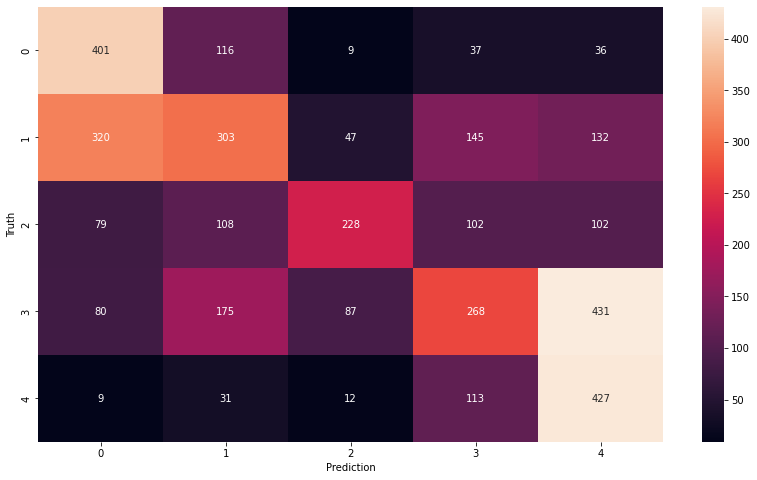

In [39]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize = (14,8))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
#1. create a pipeline object
clf = Pipeline([
    ('vectorizer_bow', CountVectorizer(ngram_range = (1, 1))),        #using the ngram_range parameter 
    ('Random Forest', RandomForestClassifier())
])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.54      0.59      0.57       599
           1       0.51      0.37      0.43       947
           2       0.47      0.86      0.61       619
           3       0.50      0.35      0.41      1041
           4       0.50      0.53      0.52       592

    accuracy                           0.50      3798
   macro avg       0.51      0.54      0.51      3798
weighted avg       0.51      0.50      0.49      3798



### Accurecy Matrix

In [42]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[354, 142,  44,  30,  29],
       [205, 348, 213, 118,  63],
       [ 11,  26, 532,  35,  15],
       [ 63, 143, 270, 360, 205],
       [ 18,  24,  63, 171, 316]], dtype=int64)

In [43]:
clf.score(X_test, y_test) 

0.5028962611901

# Save the model

In [1]:
# import pickle

In [ ]:
# with open('model_pickle','wb') as file:
#     pickle.dump(clf,file)